In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [4]:
city_csv_path = os.path.join("Resources","city_data.csv")
city_df = pd.read_csv(city_csv_path)

ride_csv_path = os.path.join("Resources","ride_data.csv")
ride_df = pd.read_csv(ride_csv_path)

In [5]:
city_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [7]:
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
sum(city_df['type'] == "Rural")

18

In [9]:
ride_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2370    False
2371    False
2372    False
2373    False
2374    False
Length: 2375, dtype: bool

In [10]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [11]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
pyber_data_df.duplicated().sum()

0

<AxesSubplot:>

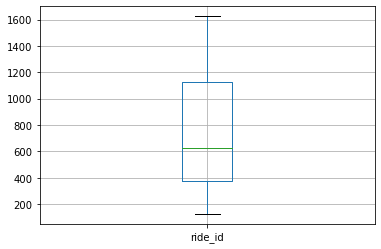

In [15]:
total_ride_count_df = pyber_data_df.groupby(["type"])[["ride_id"]].count()
total_ride_count_df
total_ride_count_df.boxplot(column=['ride_id']) 


<AxesSubplot:>

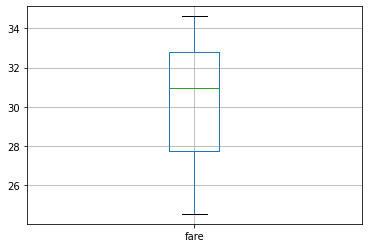

In [16]:
fare_df = pyber_data_df.groupby(["type"])[["fare"]].mean()
fare_df.boxplot(column=['fare'])

<AxesSubplot:>

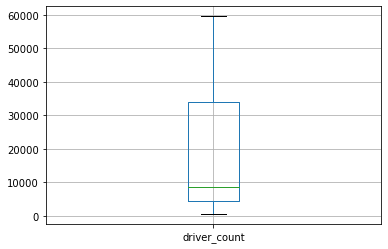

In [17]:
driver_df = pyber_data_df.groupby(["type"])[["driver_count"]].sum()
driver_df.boxplot(column=["driver_count"])

<AxesSubplot:ylabel='ride_id'>

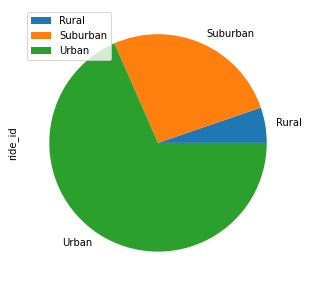

In [18]:
ride_df = pyber_data_df.groupby(["type"])[["ride_id"]].count()
ride_df.plot.pie(y='ride_id', figsize=(5, 5))

<AxesSubplot:ylabel='fare'>

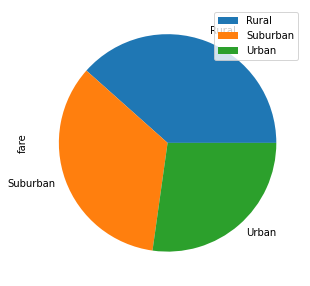

In [19]:
fare_df = pyber_data_df.groupby(["type"])[["fare"]].mean()
fare_df.plot.pie(y='fare', figsize=(5,5))

<AxesSubplot:ylabel='driver_count'>

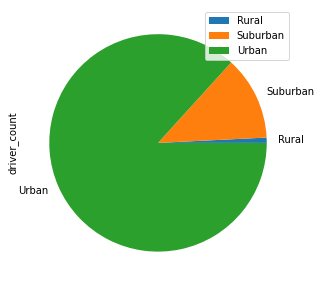

In [20]:
driver_df = pyber_data_df.groupby(["type"])[["driver_count"]].sum()
driver_df.plot.pie(y="driver_count", figsize=(5,5))

In [21]:
avg_fare_city = pyber_data_df.groupby(["city"])[["fare"]].mean()
avg_fare_city

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000
...,...
West Robert,25.123871
West Samuelburgh,21.767600
Williamsonville,31.875000


In [22]:
ride_city_df = pyber_data_df.groupby(["city"])[["ride_id"]].count()
ride_city_df

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10
...,...
West Robert,31
West Samuelburgh,25
Williamsonville,14


In [23]:
driver_count_city_df = pyber_data_df.groupby(["city"])[["driver_count"]].mean()
driver_count_city_df

,driver_count
city,
Amandaburgh,12.0
Barajasview,26.0
Barronchester,11.0
Bethanyland,22.0
Bradshawfurt,7.0
...,...
West Robert,39.0
West Samuelburgh,73.0
Williamsonville,2.0


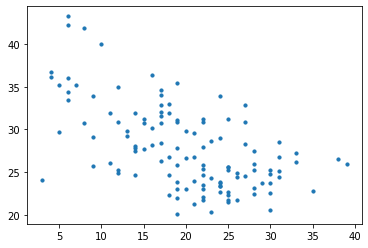

In [24]:
plt.scatter(ride_city_df, avg_fare_city, s=10)

In [25]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_ride_count_df = urban_cities_df.groupby(["city"])[["ride_id"]].count()
urban_cities_ride_count_df

,ride_id
city,
Amandaburgh,18
Barajasview,22
Carriemouth,27
Christopherfurt,27
Deanville,19
...,...
West Patrickchester,16
West Robert,31
West Samuelburgh,25


In [26]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df
suburban_cities_ride_count_df = suburban_cities_df.groupby(["city"])[["ride_id"]].count()
suburban_cities_ride_count_df

,ride_id
city,
Barronchester,16
Bethanyland,18
Brandonfort,19
Colemanland,22
Davidfurt,17
East Aaronbury,9
East Danielview,17
East Kentstad,13
East Marymouth,27


In [27]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df
rural_cities_ride_count_df = rural_cities_df.groupby(["city"])[["ride_id"]].count()
rural_cities_ride_count_df

,ride_id
city,
Bradshawfurt,10
Garzaport,3
Harringtonfort,6
Jessicaport,6
Lake Jamie,6
Lake Latoyabury,11
Michaelberg,12
New Ryantown,6
Newtonview,4


In [28]:
urban_cities_avg_fare_df = urban_cities_df.groupby(["city"])[["fare"]].mean()
urban_cities_avg_fare_df

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Carriemouth,28.314444
Christopherfurt,24.501852
Deanville,25.842632
...,...
West Patrickchester,28.233125
West Robert,25.123871
West Samuelburgh,21.767600


In [29]:
suburban_cities_avg_fare_df = suburban_cities_df.groupby(["city"])[["fare"]].mean()
suburban_cities_avg_fare_df

,fare
city,
Barronchester,36.422500
Bethanyland,32.956111
Brandonfort,35.437368
Colemanland,30.894545
Davidfurt,31.995882
East Aaronbury,25.661111
East Danielview,31.560588
East Kentstad,29.823077
East Marymouth,30.835185


In [31]:
rural_cities_avg_fare_df = rural_cities_df.groupby(["city"])[["fare"]].mean()
rural_cities_avg_fare_df

,fare
city,
Bradshawfurt,40.064000
Garzaport,24.123333
Harringtonfort,33.470000
Jessicaport,36.013333
Lake Jamie,34.358333
Lake Latoyabury,26.061818
Michaelberg,34.997500
New Ryantown,43.278333
Newtonview,36.745000


In [33]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

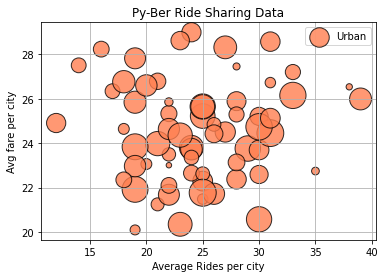

In [40]:
plt.scatter(urban_cities_ride_count_df, urban_cities_avg_fare_df, s=10*urban_driver_count, color='coral', 
        edgecolor="black", linewidths=1,
        alpha=0.8, label="Urban")
plt.title("Py-Ber Ride Sharing Data")
plt.xlabel("Average Rides per city")
plt.ylabel("Avg fare per city")
plt.grid(True)
plt.legend()

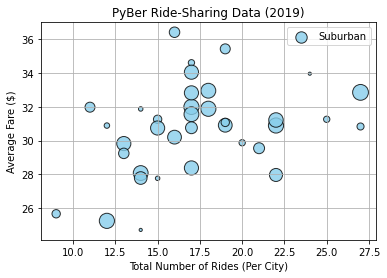

In [42]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_cities_ride_count_df,
      suburban_cities_avg_fare_df,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

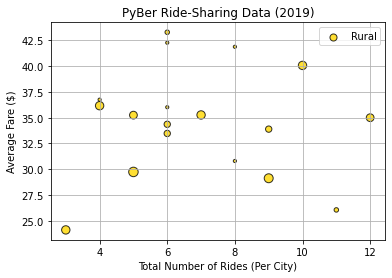

In [43]:
# Build the scatter plots for rural cities.
plt.scatter(rural_cities_ride_count_df,
      rural_cities_avg_fare_df,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

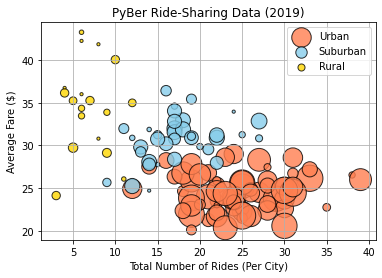

In [44]:
# Add the scatter charts for each type of city.
#Urban
plt.scatter(urban_cities_ride_count_df, urban_cities_avg_fare_df, s=10*urban_driver_count, color='coral', 
        edgecolor="black", linewidths=1,
        alpha=0.8, label="Urban")
plt.title("Py-Ber Ride Sharing Data")
plt.xlabel("Average Rides per city")
plt.ylabel("Avg fare per city")
plt.grid(True)
plt.legend()

#Suburban
plt.scatter(suburban_cities_ride_count_df,
      suburban_cities_avg_fare_df,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

#Rural
plt.scatter(rural_cities_ride_count_df,
      rural_cities_avg_fare_df,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()
